In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

##### Data Preparation

In [3]:
df = pd.read_csv('FertilizersProduct.csv', encoding= 'latin-1')
display(df.head())

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164468 entries, 0 to 164467
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     164468 non-null  int64  
 1   Area          164468 non-null  object 
 2   Item Code     164468 non-null  int64  
 3   Item          164468 non-null  object 
 4   Element Code  164468 non-null  int64  
 5   Element       164468 non-null  object 
 6   Year Code     164468 non-null  int64  
 7   Year          164468 non-null  int64  
 8   Unit          164468 non-null  object 
 9   Value         164468 non-null  float64
 10  Flag          164468 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ MB


In [5]:
df_fertilizer = df.copy()
df_fertilizer.drop(['Area Code', 'Item Code', 'Year Code', 'Element Code', 'Flag'], inplace= True, axis= 1)
display(df_fertilizer.head())

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Ammonia, anhydrous",Import Quantity,2011,tonnes,4.49
1,Afghanistan,"Ammonia, anhydrous",Import Quantity,2014,tonnes,2.00
2,Afghanistan,"Ammonia, anhydrous",Import Quantity,2017,tonnes,2.07
3,Afghanistan,"Ammonia, anhydrous",Import Value,2011,1000 US$,2.69
4,Afghanistan,"Ammonia, anhydrous",Import Value,2014,1000 US$,1.07


In [66]:
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

In [7]:
df_fertilizer.describe()

,Year,Value
count,164468.000000,1.644680e+05
mean,2009.734125,9.460314e+04
std,4.542937,6.910195e+05
min,2002.000000,-1.043000e+03
25%,2006.000000,4.553000e+01
50%,2010.000000,9.891650e+02
75%,2014.000000,1.502811e+04
max,2017.000000,4.904667e+07


##### Data Exploration

In [8]:
print('Jumlah = ', len(df_fertilizer['Area'].unique()))
print(df_fertilizer['Area'].unique())

Jumlah =  171
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chile' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Colombia' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of the Congo' 'Denmark'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ire

In [9]:
print('Jumlah = ', len(df_fertilizer['Element'].unique()))
df_fertilizer['Element'].unique()

Jumlah =  6


array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value', 'Production', 'Agricultural Use'], dtype=object)

In [10]:
print('Jumlah = ', len(df_fertilizer['Item'].unique()))
df_fertilizer['Item'].unique()

Jumlah =  23


array(['Ammonia, anhydrous', 'Ammonium nitrate (AN)', 'Ammonium sulphate',
       'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
       'Diammonium phosphate (DAP)', 'Fertilizers n.e.c.',
       'Monoammonium phosphate (MAP)', 'NPK fertilizers',
       'Other nitrogenous fertilizers, n.e.c.', 'Other NP compounds',
       'Other phosphatic fertilizers, n.e.c.',
       'Other potassic fertilizers, n.e.c.', 'Phosphate rock',
       'PK compounds', 'Potassium chloride (muriate of potash) (MOP)',
       'Potassium nitrate',
       'Potassium sulphate (sulphate of potash) (SOP)', 'Sodium nitrate',
       'Superphosphates above 35%', 'Urea',
       'Urea and ammonium nitrate solutions (UAN)', 'Other NK compounds',
       'Superphosphates, other'], dtype=object)

In [11]:
#Filter data pupuk indonesia
df_indonesia = df_fertilizer[df_fertilizer['Area'] == 'Indonesia']
df_indonesia.head().reset_index()

,index,Area,Item,Element,Year,Unit,Value
0,66886,Indonesia,"Ammonia, anhydrous",Import Quantity,2002,tonnes,202.50
1,66887,Indonesia,"Ammonia, anhydrous",Import Quantity,2003,tonnes,0.02
2,66888,Indonesia,"Ammonia, anhydrous",Import Quantity,2004,tonnes,5.95
3,66889,Indonesia,"Ammonia, anhydrous",Import Quantity,2005,tonnes,25529.55
4,66890,Indonesia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,5999.43


In [12]:
#Total produksi pupuk di Indonesia
indo_prod = df_indonesia.loc[df_indonesia.Element == 'Production']
total_prod = indo_prod.groupby(['Year'])['Value'].sum().reset_index()

fig = px.line(total_prod, x= 'Year', y= 'Value', markers= True)
fig.update_layout(title= {'text': 'Total Produksi Pupuk Indonesia per Tahun',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')

fig.show()

In [13]:
#Jenis pupuk yang paling banyak diproduksi di Indonesia pada tahun 2017
most_fertilizer_prod_item = indo_prod.groupby(['Item'])['Value'].sum().reset_index().sort_values(by= 'Value', ascending= False).head(5)

fig = go.Figure(data=[go.Bar(
    x= most_fertilizer_prod_item.Item, 
    y= most_fertilizer_prod_item.Value, 
    marker_color= 'indianred')])
fig.update_layout(title= {'text': 'Jenis Pupuk yang Paling Banyak diproduksi di Indonesia',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')

fig.show()

In [14]:
indo_usage = df_indonesia.loc[df_indonesia.Element == 'Agricultural Use']
total_usage = indo_usage.groupby(['Year'])['Value'].sum().reset_index()

fig = px.line(total_usage, x= 'Year', y= 'Value', markers= True)
fig.update_layout(title= {'text': 'Total Penggunaan Pupuk Indonesia per Tahun',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')

fig.show()

In [15]:
most_fertilizer_used_item = indo_usage.groupby(['Item'])['Value'].sum().reset_index().sort_values(by= 'Value', ascending= False).head(5)

fig = go.Figure(data=[go.Bar(
    x= most_fertilizer_used_item.Item, 
    y= most_fertilizer_used_item.Value, 
    marker_color= 'crimson')])
fig.update_layout(title= {'text': 'Jenis Pupuk yang Paling Banyak digunakan di Indonesia',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')

fig.show()

In [16]:
#Total import dan export pupuk Indonesia
indo_export_import = df_indonesia[(df_indonesia.Element == 'Export Quantity')|(df_indonesia.Element == 'Import Quantity')]
total_export_import = indo_export_import.groupby(['Year','Element'])['Value'].sum().reset_index()

fig = px.line(total_export_import, x= 'Year', y= 'Value', color= 'Element', markers= True)
fig.update_layout(title= {'text': 'Total Export dan Import Pupuk Indonesia per Tahun',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')

fig.show()

In [38]:
fig = px.pie(indo_export_import, values= indo_export_import.Element.value_counts(),
             names= indo_export_import.Element.unique(),
             color= indo_export_import.Element.unique(),
             color_discrete_map= {'Import Quantity': 'red',
                                  'Export Quantity': 'blue'
                                  }
             )
fig.update_traces(textposition= 'outside', textinfo= 'label+percent')
fig.update_layout(title= {'text': 'Perbandingan Export dan Import Pupuk Indonesia',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'})

fig.show()

In [18]:
most_fertilizer_export_item = indo_export_import.loc[indo_export_import.Element == 'Export Quantity'].groupby(['Item'])['Value'].sum().reset_index().sort_values(by= 'Value', ascending= False).head(5)

fig = go.Figure(data=[go.Bar(x= most_fertilizer_export_item.Item, 
                             y= most_fertilizer_export_item.Value,
                             text= most_fertilizer_export_item.Value,
                             marker_color= 'Blue')
                      ])
                     
fig.update_layout(title= {'text': 'Jenis Pupuk yang Paling Banyak di export di Indonesia',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')
fig.show()

In [19]:
 most_fertilizer_import_item = indo_export_import.loc[indo_export_import.Element == 'Import Quantity'].groupby(['Item'])['Value'].sum().reset_index().sort_values(by= 'Value', ascending= False).head(5)
 
 fig = go.Figure(data=[go.Bar(x= most_fertilizer_import_item.Item,
                              y= most_fertilizer_import_item.Value,
                              text= most_fertilizer_import_item.Value,
                              marker_color= 'red')
                      ])
 fig.update_layout(title= {'text': 'Jenis Pupuk yang Paling Banyak di import di Indonesia',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'bottom'},
                  yaxis_title= 'Value (ton)')
fig.show()

In [20]:
#Konversi angka menjadi ribu, juta dan seterusnya
millname = ['', ' Ribu', ' Juta', ' Miliar', ' Triliun']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millname)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millname[millidx])

In [65]:
export_value = df_indonesia[(df['Element'] == 'Export Value')]
total_export_value = export_value.Value.sum()
export_value_2017 = export_value[export_value['Year'] == 2017].Value.sum()
print(f'Total nilai export pupuk indonesia sebesar {millify(total_export_value * 1000)} dolar')
print(f'Nilai export pupuk indonesia pada tahun 2017 sebesar {millify(export_value_2017 * 1000)} dolar')

Total nilai export pupuk indonesia sebesar 10 Miliar dolar
Nilai export pupuk indonesia pada tahun 2017 sebesar 581 Juta dolar


In [22]:
import_value = df_indonesia[(df['Element'] == 'Import Value')]
total_import_value = import_value.Value.sum()
import_value_2017 = import_value[import_value['Year'] == 2017].Value.sum()
print(f'Total nilai import pupuk indonesia sebesar {millify(total_import_value * 1000)} dolar')
print(f'Nilai import pupuk indonesia pada tahun 2017 sebesar {millify(import_value_2017 * 1000)} dolar')

Total nilai import pupuk indonesia sebesar 24 Miliar dolar
Nilai import pupuk indonesia pada tahun 2017 sebesar 2 Miliar dolar


In [23]:
most_country = df_fertilizer[(df_fertilizer.Element == "Agricultural Use") & (df_fertilizer.Year == 2017)]
most_country = most_country.groupby(['Area']).Value.sum().reset_index().sort_values(by = 'Value', ascending = False)
display(most_country.head(10))

,Area,Value
20,India,54996200.0
45,United States of America,45255287.0
14,Egypt,19388269.0
5,Brazil,13468902.0
35,Pakistan,9807762.0
21,Indonesia,9560207.0
16,France,8924208.0
6,Canada,8291000.0
29,Mexico,7778873.0
44,Turkey,6144749.0


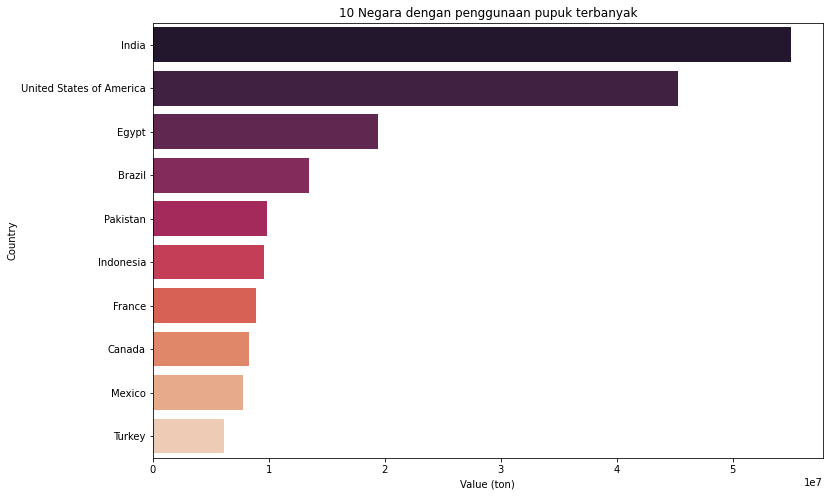

In [24]:
plt.figure(figsize= (12, 8))
sns.barplot(data= most_country.head(10), x= 'Value', y= 'Area', palette= 'rocket')
plt.title('10 Negara dengan penggunaan pupuk terbanyak')
plt.ylabel('Country')
plt.xlabel('Value (ton)')
plt.show()

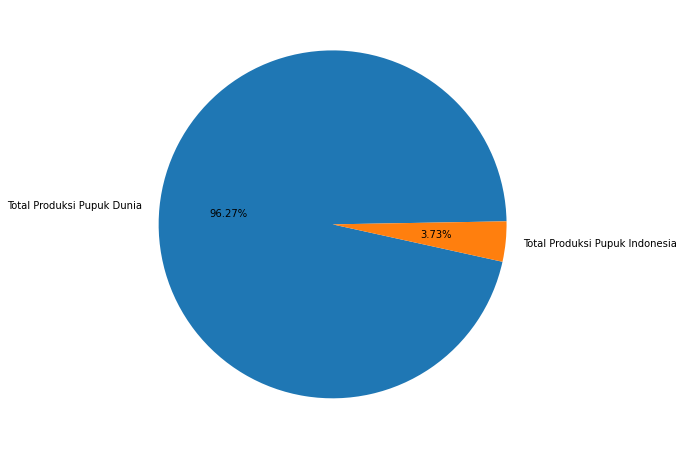

In [63]:
total_world_production = df_fertilizer[df_fertilizer.Element == 'Production'].Value.sum()
total_indo_production = indo_prod.Value.sum()

plt.figure(figsize= (12, 8))
plt.pie(x= [world_production, total_indo_production],
        labels= ['Total Produksi Pupuk Dunia', 'Total Produksi Pupuk Indonesia'],
        labeldistance= 1.1,
        startangle= 1,
        radius= 1,
        autopct= '%.2f%%')

plt.show()
